# 超音波ガイド波実験の素材収集用コード

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import MaxNLocator
import os

In [63]:
# ファイルの読込み
filepath = './source/csv/250923実験分/非貫通/複数コイル_HPFoff_260khz.csv'
df = pd.read_csv(filepath, encoding='cp932')
# df.head(10)
df.columns

Index(['Unnamed: 0', '時間[μs]', ' 加算平均値[V]', '使用したデータ[V]', '元信号[V]', '電流値[I]',
       'コンターマップ[mΦ0]', '使用データ', 'Average', 'DC', '0.003058'],
      dtype='object')

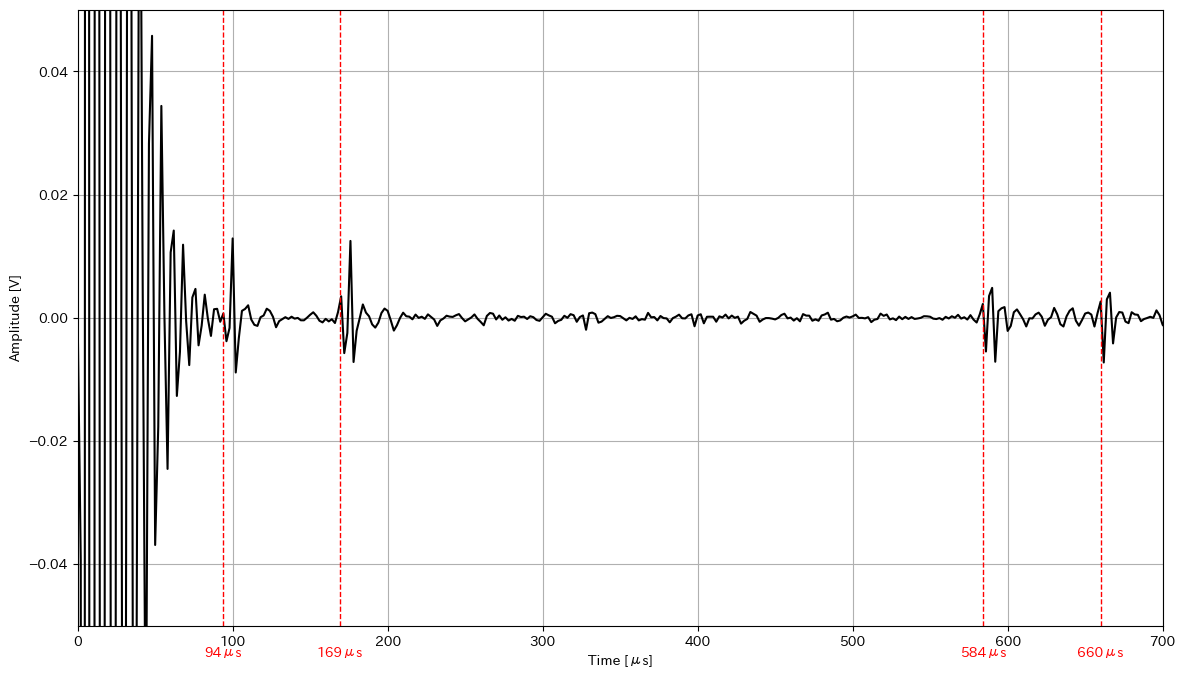

In [64]:
# 縦線の位置
x_lines = [94, 169, 584, 660]

plt.figure(figsize=(14, 8))
plt.plot(df['時間[μs]'], df[' 加算平均値[V]'], label='振幅', color='black')

for x in x_lines:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1) 
    plt.text(x, -0.055, f'{x}μs', color='red', fontsize=10, ha='center')

plt.grid(True)
plt.xlabel('Time [μs]')
plt.ylabel('Amplitude [V]')
# plt.title('xxx')
plt.xlim(0, 700)
plt.ylim(-0.05, 0.05)
plt.show()